In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns
from sklearn.metrics import r2_score

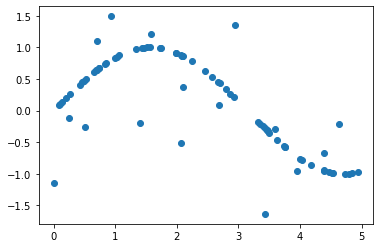

In [2]:
# wir wollen eine Sinuskurve zu vorhersagen.
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Damit die Vorhersage nicht zu einfach wird, kommt rauschen dazu durch Anpassen einzelner Y-Werte
y[::5] += 3 * (0.5 - rng.rand(16))

plt.scatter(X, y)

Hilfsfunktion für Metriken:

# Lineare Regression

R2 Score von: 0.4337222216968736


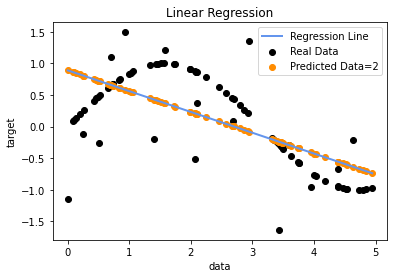

In [3]:
from sklearn.linear_model import LinearRegression # importiere die Bibliothek für logistische Regression
linRegressor = LinearRegression() # keine spezifischen Parameter angegeben, d.h. nur Standardwerte
linRegressor.fit(X, y) # trainiere das Modell auf den Trainingsdaten
y_pred_lin_regression = linRegressor.predict(X) # und sage vorher....das wars schon!!

print("R2 Score von:", r2_score(y, y_pred_lin_regression))

plt.figure()

plt.scatter(X, y, color='black', label='Real Data')
plt.scatter(X, y_pred_lin_regression, color='darkorange', label='Predicted Data=2')
plt.plot(X, y_pred_lin_regression, color="cornflowerblue", label="Regression Line", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Naive Bayes

R2 Score von: 0.43360376075298623


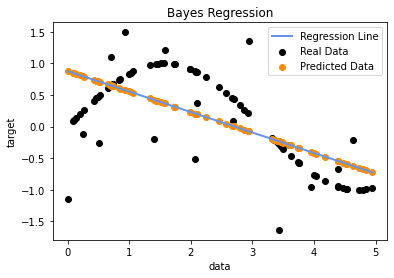

In [4]:
from sklearn import linear_model

regBayes = linear_model.BayesianRidge()

regBayes.fit(X, y)
y_pred_BayesRegressor = regBayes.predict(X)

print("R2 Score von:", r2_score(y, y_pred_BayesRegressor))

plt.figure()

plt.scatter(X, y, color='black', label='Real Data')
plt.scatter(X, y_pred_BayesRegressor, color='darkorange', label='Predicted Data')
plt.plot(X, y_pred_BayesRegressor, color="cornflowerblue", label="Regression Line", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Bayes Regression")
plt.legend()
plt.show()

# K Nearest Neighbours

R2 Score von: 0.8044298846141534
R2 Score von: 1.0


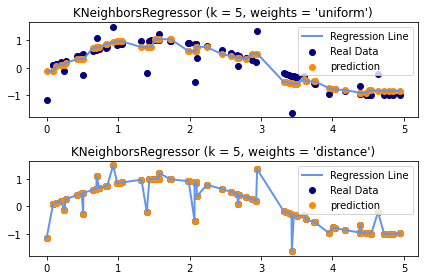

In [5]:
from sklearn import neighbors

n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(X, y)
    y_pred_KNN = knn.predict(X)

    print("R2 Score von:", r2_score(y, y_pred_KNN))

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='navy', label='Real Data')
    plt.scatter(X, y_pred_KNN, color='darkorange', label='prediction')
    plt.plot(X, y_pred_KNN, color="cornflowerblue", label="Regression Line", linewidth=2)
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

# Entscheidungsbaum

R2 Score von: 0.7629899797432984
R2 Score von: 0.9538725108408801


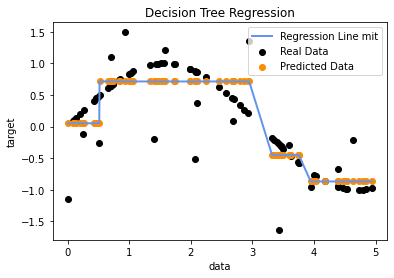

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

TreeRegr = DecisionTreeRegressor(max_depth=2)
TreeRegr2 = DecisionTreeRegressor(max_depth=5)

TreeRegr.fit(X, y)
TreeRegr2.fit(X, y)

y_pred_tree = TreeRegr.predict(X)
y_pred_tree2 = TreeRegr2.predict(X)

print("R2 Score von:", r2_score(y, y_pred_tree))
print("R2 Score von:", r2_score(y, y_pred_tree2))

plt.figure()

plt.scatter(X, y, color='black', label='Real Data')
plt.scatter(X, y_pred_tree, color='darkorange', label='Predicted Data')
#plt.scatter(X, y_pred_tree2, color='r', label='Predicted Data mit max_depth=5')
plt.plot(X, y_pred_tree, color="cornflowerblue", label="Regression Line mit", linewidth=2)
#plt.plot(X, y_pred_tree2, color="green", label="Regression Line", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


# Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

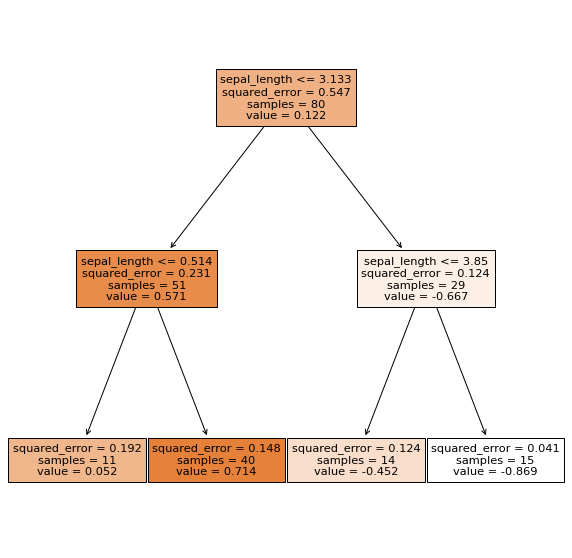

In [7]:
from sklearn import tree
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(TreeRegr, 
                   feature_names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],  
                   class_names=["Iris-setosa", "Iris-versicolor", "Iris-virginica"],
                   filled=True)

Support Vector Regressor

R2 Score von: 0.7700033840714311


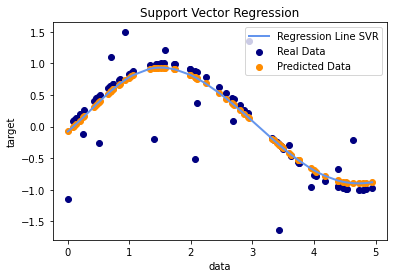

In [8]:
from sklearn import svm
from sklearn.svm import SVR


SVR_basis = svm.SVR()
SVR_basis.fit(X, y)
y_pred_SVM_basis = SVR_basis.predict(X)

print("R2 Score von:", r2_score(y, y_pred_SVM_basis))

plt.scatter(X, y, color='navy', label='Real Data')
plt.scatter(X, y_pred_SVM_basis, color='darkorange', label='Predicted Data')
plt.plot(X, y_pred_SVM_basis, color="cornflowerblue", label="Regression Line SVR", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()



# Random Forest Regressor

R2 Score von: 0.917361746237579


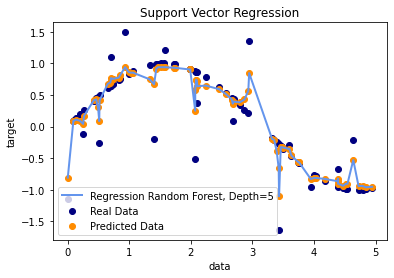

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


RFRegressor = RandomForestRegressor(max_depth=5, random_state=0)
RFRegressor.fit(X, y)
y_RFRegressor_predicted = RFRegressor.predict(X)

print("R2 Score von:", r2_score(y, y_RFRegressor_predicted))

plt.scatter(X, y, color='navy', label='Real Data')
plt.scatter(X, y_RFRegressor_predicted, color='darkorange', label='Predicted Data')
plt.plot(X, y_RFRegressor_predicted, color="cornflowerblue", label="Regression Random Forest, Depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

# XGBoost

[20:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score von: 0.9965790115785026


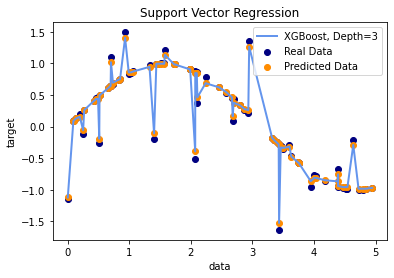

In [10]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree

XGB_Regressor = xgboost.XGBRegressor(max_depth=5)

XGB_Regressor.fit(X, y)
y_XGB_Regr = XGB_Regressor.predict(X)

print("R2 Score von:", r2_score(y, y_XGB_Regr))

plt.scatter(X, y, color='navy', label='Real Data')
plt.scatter(X, y_XGB_Regr, color='darkorange', label='Predicted Data')
plt.plot(X, y_XGB_Regr, color="cornflowerblue", label="XGBoost, Depth=3", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Support Vector Regression")
plt.legend()
plt.show()